# Machine Learning Intro

by Bart De Vylder and Pieter Buteneers from CoScale


## Intro 
Machine learning is a method to automate the building of models based on data. Instead of being explictly programmed, machine learning techniques are developed to learn models by themselves and are able to respond to new incoming data. 

A distinction is typically made between supervised machine learning and unsupervised machine learning. In **supervised machine learning**, the algorithm is given the expected outputs (labels) for at least some of the input data. It's the algorithms task to find a pattern such that it can generate correct outputs for unseen cases (generalization). The (automated) evaluation of an algorithm's performance can be done by comparing the predicted outcome to the actual one. The exercises in this notebook are of the supervised kind.

In **unsupervised machine learning**, no labels of the input data are provided. It's the algorithm job to find useful structure in the provided data. There is no standard way to (automatically) evaluate the performance/accurancy of an unsupervised machine learning problem. An example of unsupervised machine learing is clustering (we'll see an example of this in the correlation and clustering section). 

## Topics
This notebook introduces some important concepts and techniques in machine learning:
* train, validation and test sets
* overfitting
* cross-validation
* reguralization

To introduce these topics we using a simple example problem. These concepts will be applied to more practical problems in the successive parts. 

## Imports

Let's first start with importing all the necessary packages. Some imports will be repeated in the exercises but if you want to skip some parts you can just execute the imports below and start with any exercise.

As you can see we also import packages from `__future__`. This is to improve the compatibility with Python 3, but will not guarantee it.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (13.0, 8.0)
%matplotlib inline

import pickle

import sklearn
import sklearn.linear_model
import sklearn.preprocessing
import sklearn.gaussian_process
import sklearn.ensemble

# to make the code is compatible with python 3
from __future__ import print_function   # turns print into a function
from __future__ import division         # makes sure 3/2 = 1.5 and not 1 (use 3//2 = 1 instead)

## Non-linear Regression

Sometimes linear relations don't cut it anymore, so you might want a more complex method. There are 2 approaches to this:
* Use a non-linear method (such as Neural Networks, Support Vector Machines, Random Forests and Gaussian Processes)
* Use non-linear features as pre-processing for a linear method

Actually both methods are in essence identical and there is not always a clear distinction between the two. We will use the second approach in this section since it is easier to understand what is going on.

Please note that it is very often not even necessary to use non-linear methods, since the linear methods can be extremely powerful on their own and they are quite often very stable and reliable (in contrast to non-linear methods).

### Fitting a sine function with linear regression

Als an example task we will try to fit a sine function. We will use the [`np.sine()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html) function to compute the sine of the elements in a numpy array.

Let's first try this with linear regression.

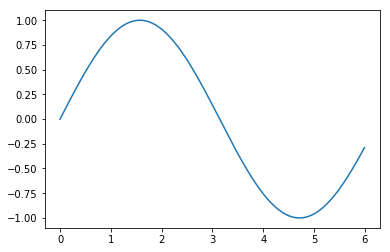

In [2]:
x = np.arange(0,6, 0.01).reshape((-1, 1))

plt.plot(x, np.sin(x))
plt.show()

For training we will draw 10 samples of this function as our train set. The **train set** is the set of data which is actually used to train the model on.

In [3]:
# helper function to generate the data
def sine_train_data(): 
    x_train = np.linspace(0, 6, 10).reshape((-1, 1))
    y_train = np.sin(x_train)
    return x_train, y_train

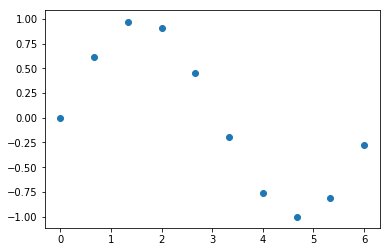

In [4]:
x_train, y_train = sine_train_data()
plt.scatter(x_train, y_train)
plt.show()

Now let's try to fit this function with linear regression.

The R2 score of this model is: 0.50587386157


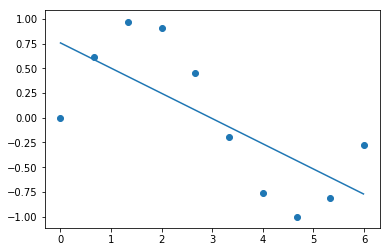

In [5]:
x_train, y_train = sine_train_data()

### BEGIN SOLUTION
model = sklearn.linear_model.LinearRegression()
model.fit(x_train, y_train)
### END SOLUTION
# model = ?
# model.fit( ? )

print('The R2 score of this model is:', model.score(x_train, y_train))

plt.scatter(x_train, y_train)
plt.plot(x, model.predict(x))
plt.show()

As you can see this fit is not optimal.

### Fitting a sine function using polynomial expansion

One of the easiest ways to make your machine learning technique more *intelligent* is to **extract relevant features** from the data. These features can be anything that you can find that will make it easier for the method to be able to fit the data. This means that as a machine learning engineer it is best to know and understand your data.

As you might remember from math class is that most well-behaving functions (the sine function is very well-behaving) can be approximated using a [Taylor expansion](https://en.wikipedia.org/wiki/Taylor_series). So we will use that approach to learn a better fit.

In this case we will create what we call features using a [polynomial expansion](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). If you set the degree to 3 it will generate data of the 0d, 1st, 2nd and 3rd order (including cross products incase yoy have multiple input variables) as shown in the example below (change x and degree to see the different expansions of x to a certain degree).

In [6]:
import sklearn.preprocessing

x = 2
pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=3)
pol_exp.fit_transform(x)

array([[ 1.,  2.,  4.,  8.]])

As you can see above this function transforms $x$ into [$x^0$, $x^1$, $x^2$, $x^3$] with $x^0=1$ and $x^1 = x$. If you have 2 inputs it will also take the cross products so that [$x_1$, $x_2$] is transformed into: [1, $x_1$, $x_2$, $x_1^2$, $x_1x_2$, $x_2^2$, $x_1^3$, $x_1^2x_2$, $x_1x_2^2$, $x_2^3$] as shown below.

In [7]:
x = [[2, 3]]
pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=3)
pol_exp.fit_transform(x)

array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.]])

In this example we only have 1 input so the number of features is always the `degree + 1`.

Because of this polynomial features extraction finding of the coefficients of the polynomial becomes a linear problem, so similar to the previous exercise on multiple linear regression you can find the optimal weights as follows:

$$y = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + \cdots + c_n x^n$$

So for multiple values of $x$ and $y$ you can minimize the error of this equation using linear regression. How this is done in practice is shown below.

The R2 score of this model is: 0.988917680887


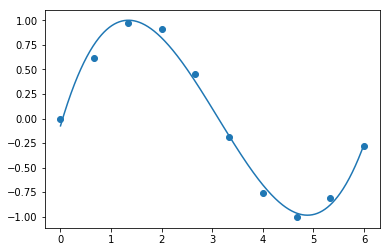

In [8]:
x_train, y_train = sine_train_data()

pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=3)

model = sklearn.linear_model.LinearRegression()
model.fit(pol_exp.fit_transform(x_train), y_train)
print('The R2 score of this model is:', model.score(pol_exp.fit_transform(x_train), y_train))

plt.scatter(x_train, y_train)
x = np.arange(0,6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

The more relevant these features are the better your model can fit the data.

Now play with the degree of the polynomal expansion function below to create better features. Search for the optimal degree.

The R2 score of this model is: 1.0


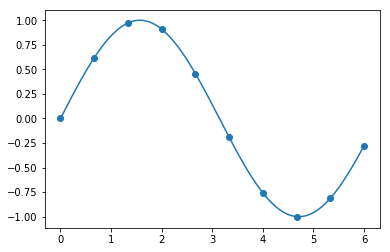

In [9]:
x_train, y_train = sine_train_data()

### BEGIN SOLUTION
pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=9)
### END SOLUTION
# pol_exp = sklearn.preprocessing.PolynomialFeatures(degree= ? )

model = sklearn.linear_model.LinearRegression()
model.fit(pol_exp.fit_transform(x_train), y_train)

train_score = model.score(pol_exp.fit_transform(x_train), y_train)
print('The R2 score of this model is:', train_score)

plt.scatter(x_train, y_train)
x = np.arange(0,6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

Now let's test this on new and unseen data. The **test set** is the set of data that is used to confirm that the final solution actually generalizes to unseen cases. 

In [10]:
def sine_test_data():
    x_test = 0.5 + np.arange(6).reshape((-1, 1))
    y_test = np.sin(x_test)
    return x_test, y_test

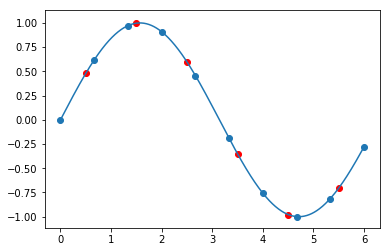

The R2 score of the model on the test set is: 0.999999999849


In [11]:
assert train_score > .99999

x_test, y_test = sine_test_data()

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='r')
x = np.arange(0, 6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

### BEGIN SOLUTION
test_score = model.score(pol_exp.fit_transform(x_test), y_test)
### END SOLUTION
# test_score = model.score( ? )

print('The R2 score of the model on the test set is:', test_score)

assert test_score > 0.99

If everything is correct your score is very close to 1. Which means that we have built a model that can fit this data (almost) perfectly.

### Add noise to the equation

Sadly all the data that we measure or gather doesn'thave the mathematical precision of the data we used here. Quite often our measurements contain noise.

So let us repeat this process for data with more noise. Similarly as above, you have to choose the optimal degree of the polynomials.

In [12]:
# a helper function to create the sine train set that can also add noise to the data
def sine_train_data(noise=None):
    x_train = np.linspace(0, 6, 10).reshape((-1, 1))
    y_train = np.sin(x_train)
    
    # a fixed set of noise so you always get the same result
    if noise == 'fixed':
        x_train += np.array([0.13175057, 0.32022099, 0.1292511, 0.40002648, 0.13826272, -0.33049664, 
                             0.02334596, -0.32071842, 0.20949734, -0.11818228]).reshape((-1, 1))
    # random noise
    elif noise == 'random' or noise == True:
        x_train += np.random.randn(len(x_train)).reshape((-1, 1)) / 5
    
    return x_train, y_train

In [13]:
x_train, y_train = sine_train_data(noise='fixed')

### BEGIN SOLUTION
pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=9)
### END SOLUTION
# pol_exp = sklearn.preprocessing.PolynomialFeatures(degree= ? )

model = sklearn.linear_model.LinearRegression()
model.fit(pol_exp.fit_transform(x_train), y_train)
print('The R2 score of this method on the train set is', model.score(pol_exp.fit_transform(x_train), y_train))

The R2 score of this method on the train set is 1.0


Now let's see what this results to in the test set.

In [14]:
x_test, y_test = sine_test_data()
print('The R2 score of the model on the test set is:', model.score(pol_exp.fit_transform(x_test), y_test))

The R2 score of the model on the test set is: -35.2293012843


As you can clearly see, this result is not that good. Why do you think this is?

Now plot the result to see the function you created.

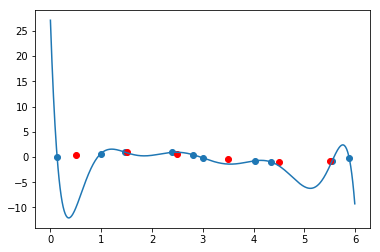

In [15]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='r')
x = np.arange(0,6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

Does this give the expected result?

Now repeat the process below a couple of times for random noise.

The R2 score of this method on the train set is 1.0


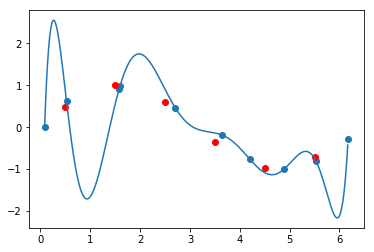

In [16]:
x_train, y_train = sine_train_data(noise='random')

pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=9)

model = sklearn.linear_model.LinearRegression()
model.fit(pol_exp.fit_transform(x_train), y_train)
print('The R2 score of this method on the train set is', model.score(pol_exp.fit_transform(x_train), y_train))

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='r')
x = np.arange(x_train[0], x_train[-1], 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

What is our method actually learning? 

Let's try to avoid this problem without changing the noise level.

The score of this method is on the train set is: 0.933106092993


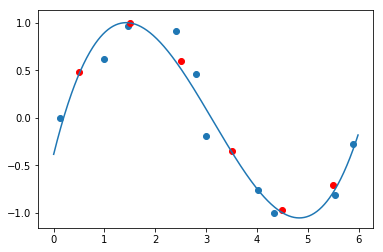

The score of the model on the test set is: 0.995534045981


In [17]:
x_train, y_train = sine_train_data(noise='fixed')
x_test, y_test = sine_test_data()

### BEGIN SOLUTION
pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=3)
model = sklearn.linear_model.LinearRegression()
model.fit(pol_exp.fit_transform(x_train), y_train)
### END SOLUTION
# pol_exp = ?
# model = ?
# model.fit( ? )

print('The score of this method is on the train set is:', model.score(pol_exp.fit_transform(x_train), y_train))

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='r')
x = np.arange(0,6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

test_score = model.score(pol_exp.fit_transform(x_test), y_test)
print('The score of the model on the test set is:', test_score)

assert test_score > 0.99

Check your solution a couple of times to make sure your solution works for different noise samples.

## Over-fitting and Cross-Validation

What you have experienced above is called **over-fitting** and happens when your model learns the noise that is inherent in the data. **Over-fitting is one of the biggest issues in machine learning** and most of the research that is currently being done in machine learning is a search for techniques to avoid it. 

This problem was caused because there were to many parameters in the model. So the model was too advanced so that it became capable of learning the noise in the data by heart. Reducing the number of parameters solves this problem. But how do you know how many parameters is optimal?

In the exercise above you had to set the number of polynomial functions to get a better result, but how can you estimate this in a reliable way without manually selection the optimal parameters?

### Validation set

A common way to solve this problem is through the use of a **validation set**. This means that you use a subset of the training data to train your model on, and another subset of the training data to validate your parameters. Based on the score of your model on this validation set you can select the optimal parameter.

So use this approach to select the best number of polynomials for the noisy sine function.

In [18]:
x_train, y_train = sine_train_data(noise='fixed')

# we randomly pick 3 datapoints to get a nice validation set
train_i = [0, 1, 3, 4, 6, 7, 9]
val_i = [2, 5, 8]

# create the train and validation sets
x_train_i = x_train[train_i, :]
y_train_i = y_train[train_i]
x_val_i = x_train[val_i, :]
y_val_i = y_train[val_i]

### BEGIN SOLUTION
pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=3)
### END SOLUTION
# pol_exp = sklearn.preprocessing.PolynomialFeatures(degree= ? )

model = sklearn.linear_model.LinearRegression()
model.fit(pol_exp.fit_transform(x_train_i), y_train_i)

### BEGIN SOLUTION
print('The R2 score of this model on the train set is:', model.score(pol_exp.fit_transform(x_train_i), y_train_i))
print('The R2 score of this model on the validation set is:', model.score(pol_exp.fit_transform(x_val_i), y_val_i))
### END SOLUTION
# print('The R2 score of this model on the train set is:', model.score( ? ))
# print('The R2 score of this model on the validation set is:', model.score( ? ))

The R2 score of this model on the train set is: 0.933841011736
The R2 score of this model on the validation set is: 0.90496274379


Now test this result on the test set with the following code.

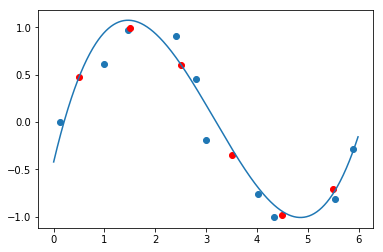

The score of the model on the test set is: 0.99505877139


In [19]:
assert pol_exp.degree < 5

x_test, y_test = sine_test_data()

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='r')
x = np.arange(0,6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

print('The score of the model on the test set is:', model.score(pol_exp.fit_transform(x_test), y_test))

As you can see this approach works to select het optimal degree. Usually the test score is lower than the validation score, but in this case it is not because the test data doesn't contain noise.

### Cross-Validation

To improve this procedure you can repeat the process above for different train and validation sets so that the optimal parameter is less dependent on the way the data was selected.

One basic strategy for this is **leave-one-out cross validation**, where each data point is left out of the train set once, and the model is then validated on this point. Now let's implement this. First make a 2-dimensional array `results` to store all your results using the [`np.ones()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) function: 1 dimension (row) for each validation set and 1 dimension (column) for each degree of the `PolynomialFeatures()` function. Then you loop over all the validation sets followed by a loop over all the degrees of the `PolynomialFeatures()` function you want to try out. Then set the result for that experiment in the right element of the `results` array.

We will use the [mean squared error (MSE)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) instead of R2 because that is more stable. Since the MSE measures the error, smaller values are better.

Now that you have your results average them over all validation sets (using the [`np.mean()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) function over the correct axis) so that you know the average error for each degree over all validation sets. Now find the the degree with the smallest error using the [`np.argmin()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html) function.

In [20]:
x_train, y_train = sine_train_data(noise='fixed')

# we're going to leave out each element exactly once
row_num = len(x_train)

# we want to test with degrees ranging from 0 to 9
degree_num = 10

### BEGIN SOLUTION
results = np.ones((row_num, degree_num))

for i in range(row_num):
### END SOLUTION
# results = ?

# for i in range( ? ):
    train_i = np.where(np.arange(10) != i)[0]
    x_train_i = x_train[train_i, :]
    y_train_i = y_train[train_i]
    x_val_i = x_train[i:i+1, :]
    y_val_i = y_train[i:i+1]

### BEGIN SOLUTION
    for degree in range(degree_num):
        pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=degree)
### END SOLUTION
    # for degree in range(?):
        # pol_exp = sklearn.preprocessing.PolynomialFeatures(degree= ? )

        model = sklearn.linear_model.LinearRegression()
        model.fit(pol_exp.fit_transform(x_train_i), y_train_i)
        
### BEGIN SOLUTION
        results[i, degree] = sklearn.metrics.mean_squared_error(model.predict(pol_exp.fit_transform(x_val_i)), y_val_i)
### END SOLUTION
        # results[ ?, ? ] = sklearn.metrics.mean_squared_error(model.predict(pol_exp.fit_transform(x_val_i)), y_val_i)

### BEGIN SOLUTION
average_results = np.mean(results, axis=0)
degree = np.argmin(average_results)
### END SOLUTION
# average the results over all validation sets
# average_results = np.mean(results, axis= ? )
# find the optimal degree
# degree = np.argmin( ? )

print('The optimal degree for the polynomials is:', degree)

The optimal degree for the polynomials is: 3


Now let's have a look at the result.

The score of this method is on the train set is: 0.933106092993


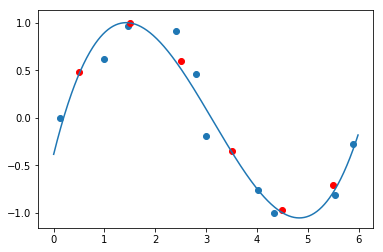

The score of the model on the test set is: 0.995534045981


In [21]:
assert degree == 3

pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=degree)

model = sklearn.linear_model.LinearRegression()
model.fit(pol_exp.fit_transform(x_train), y_train)
print('The score of this method is on the train set is:', model.score(pol_exp.fit_transform(x_train), y_train))

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='r')
x = np.arange(0,6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

print('The score of the model on the test set is:', model.score(pol_exp.fit_transform(x_test), y_test))

As you can see this automatic way of selecting the optimal degree has resulted in a good fit for the sine function.

### Regularisation

When you have too many parameters in your model, there is a risk of overfitting, i.e. your model learns the noise. To avoid this, techniques have been developed to make an estimation of this noise. 

One of these techniques is Ridge Regression. This linear regression technique has an additional parameter called the regularisation parameter. This parameter basically sets the standard deviation of the noise you want to remove. The effect in practice is that it makes sure the weights of linear regression remain small and thus less over-fitting.

Since this is an additional parameter that needs to be set, it needs to be set using cross-validation as well. Luckily sklearn developed a method that does this for us in a computational efficient way called [`sklearn.linear_model.RidgeCV()`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

The R2 score of this method is on the train set is: 0.921378720417


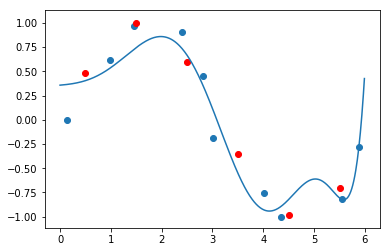

The R2 score of the model on the test set is: 0.953214648816


In [22]:
x_train, y_train = sine_train_data(noise='fixed')

pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=9)
### BEGIN SOLUTION
model = sklearn.linear_model.RidgeCV()
### END SOLUTION
# model = sklearn.linear_model. ?


model.fit(pol_exp.fit_transform(x_train), y_train)
print('The R2 score of this method is on the train set is:', model.score(pol_exp.fit_transform(x_train), y_train))

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='r')
x = np.arange(0,6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

print('The R2 score of the model on the test set is:', model.score(pol_exp.fit_transform(x_test), y_test))

As you can see above, the result of Ridge Regression is not as good as reducing the number of features in this example. However it works a lot better than without regularisation (try that). In the example above you will notice that it makes the result a lot smoother and removes the unwanted spikes. It will actually make sure that if you have too many features you still get a reasonable result. So this means that it should be in your standard toolkit.

The removal of the extra features can be automated using feature selection. A very short introduction to sklearn on the topic can be found [here](http://scikit-learn.org/stable/modules/feature_selection.html).

Another method that is often used is [`sklearn.linear_model.LassoCV()`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) which actually combines removal of features and estimation of the noise. It is however very dependent on the dataset which of the two methods performs best.

Cross-validation should be applied to any parameter you set in your function and that without looking at the test set.


### Extrapolation

Now let's extend the range of the optimal plot you achieved from -4 to 10. What do you see? Does it look like a sine function?

The R2 score of this method is on the train set is: 0.911578738307


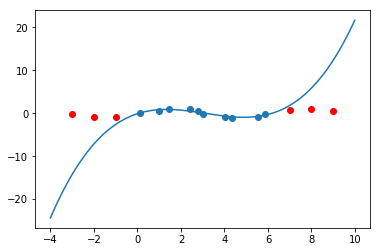

The R2 score of the model on the test set outside the area used for training is: -129.340463093


In [23]:
x_train, y_train = sine_train_data(noise='fixed')

pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=3)

model = sklearn.linear_model.RidgeCV()
model.fit(pol_exp.fit_transform(x_train), y_train)
print('The R2 score of this method is on the train set is:', model.score(pol_exp.fit_transform(x_train), y_train))

# Now test outside the area of the training
x_test_extended = np.array([-3,-2,-1,7,8,9]).reshape((-1, 1))
y_test_extended = np.sin(x_test_extended)

plt.scatter(x_train, y_train)
plt.scatter(x_test_extended, y_test_extended, color='r')
x = np.arange(-4,10, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

print('The R2 score of the model on the test set outside the area used for training is:',
      model.score(pol_exp.fit_transform(x_test_extended), y_test_extended))

As you can see, the extrapolation results for non-linear regression don't work very well. This is a general trait of machine learning: the models only work well in the input space they have been trained in. 